In [1]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)
pd.set_option('display.max_columns', 50)

In [2]:
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
eventos = pd.read_csv('events.csv')

In [3]:
## CREAMOS UNA COLUMNA CON CONTENIDO VACIO.
eventos['sistema'] = ''

In [4]:
## SEGÚN QUE FAMILIA DE SO POSEA ACTUALIZAMOS NUESTRA NUEVA COLUMNA.
eventos.loc[eventos.operating_system_version.str.contains('Mac', na=False), 'sistema'] = 'MacOS'
eventos.loc[eventos.operating_system_version.str.contains('iOS', na=False), 'sistema'] = 'iOS'
eventos.loc[eventos.operating_system_version.str.contains('Chrome', na=False), 'sistema'] = 'Chrome'
eventos.loc[eventos.operating_system_version.str.contains('Tizen', na=False), 'sistema'] = 'Tizen'
eventos.loc[eventos.operating_system_version.str.contains('Android', na=False), 'sistema'] = 'Android'
eventos.loc[eventos.operating_system_version.str.contains('Windows Phone', na=False), 'sistema'] = 'Windows Phone'
eventos.loc[eventos.operating_system_version.str.contains('Ubuntu', na=False), 'sistema'] = 'Ubuntu'
eventos.loc[eventos.operating_system_version.str.contains('Linux', na=False), 'sistema'] = 'Linux'
## CASO PARTICULAR, WINDOWS Y WINDOWS PHONE COMPARTEN LA PALABRA.
eventos.loc[(eventos.operating_system_version.str.contains('Windows', na=False) & ~eventos.operating_system_version.str.contains('Phone', na=False)), 'sistema'] = 'Windows'

In [5]:
## QUEREMOS VER PARA AQUELLOS SISTEMAS NO CONOCIDOS, QUE INFORMACIÓN HAY.
eventos_sistemasRaros = eventos.loc[eventos.sistema == '',:]
eventos_sistemasRaros['operating_system_version'].value_counts()
## EL RESULTADO NOS DICE QUE HAY CASI UN MILLÓN DE NULOS Y MUY POCOS CON EL NOMBRE OTHERS (DESPRECIABLE)

Other     48
Name: operating_system_version, dtype: int64

In [6]:
## SOLO NOS QUEDAMOS CON AQUELLAS FILAS QUE TIENEN VALOR.
sistemas = eventos.loc[eventos['sistema'] != '']
## GUARDAMOS LAS APARICIONES AGRUPADAS.
sistemas = sistemas['sistema'].value_counts()

Text(0,0.5,'Familia del Sistema Operativo')

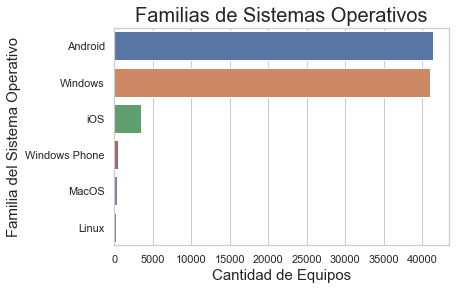

In [7]:
## AHORA MOSTRAMOS UN PRIMER GRÁFICO.
g = sns.barplot(x=sistemas.head(6).values, y=sistemas.head(6).index, orient='h')
g.set_title("Familias de Sistemas Operativos", fontsize=20)
g.set_xlabel("Cantidad de Equipos", fontsize=15)
g.set_ylabel("Familia del Sistema Operativo", fontsize=15)

In [8]:
## ACA PASAMOS LAS COLUMNAS QUE TIENEN UNA CANTIDAD DE VALORES LIMITADA A UN TIPO CATEGORY
eventos['event'] = eventos['event'].astype('category')
eventos['condition'] = eventos['condition'].astype('category')
eventos['storage'] = eventos['storage'].astype('category')
eventos['search_engine'] = eventos['search_engine'].astype('category')
eventos['channel'] = eventos['channel'].astype('category')
eventos['new_vs_returning'] = eventos['new_vs_returning'].astype('category')
eventos['device_type'] = eventos['device_type'].astype('category')
eventos['sistema'] = eventos['sistema'].astype('category')
eventos['timestamp'] = pd.to_datetime(eventos['timestamp'], infer_datetime_format=True)

<h2>
    Preguntas para contestar sobre el set de datos: 
    <br/>
    (Despues discutimos cuales ponemos y cuales sacamos, pero la idea es ir poniendo preguntas interesantes aca)
</h2>
<ul>
    <li><h5>Como evoluciono las visitas al sitio, las campañas tuvieron algo que ver? (FALTA GRAFICO)</h5></li>
    <li><h5>Que proporcion de usuarios regresan al sitio luego de visitarlo por primera vez?</h5></li>
    <li><h5>Cuales son las marcas y modelos más visitados/comprados?</h5>
    <li><h5>Si un usuario marco como lead en un producto, ver cuantas veces termina comprandolo.</h5></li>
</ul>


## Cosas a tener en cuenta:

### Actividad del usuario.
Se puede ver que en primer instancia cada usuario tiene varios eventos, que en un lapso de tiempo realiza una actividad (conjunto continuo de eventos), pero hay que tener en cuenta que puede ingresar otro día o en otro momento dentro del mismo día realizando otra actividad.

### Columnas acordes a los eventos.
Según el tipo de evento hay columnas que se usan y columnas que no, las cuales hay que tener en cuenta a la hora de hacer trabajos sobre ese tipo de evento.

### TIempo de permanencia en el sitio.
Cuando tengamos armadas las actividades de cada usuario, podremos por ejemplo discernir un tiempo promedio de estadía en el sitio web (tiempo de navegación de las actividades), también vale aclarar que llegado a este punto podemos por ejemplo entrar a hacer vinculaciones con la ciudad, tipo de dispositivo, y similares, por ejemplo tomando las ciudades con más actividades como varían sus tiempos de estadía en el sitio o algo por el estilo.rafi

### Graficos generales.
Hay ciertos gráficos, como el de las familias de SO que son bastantes básicos, pero que a mi entender tendrían que estar como para mostrar un análisis general (muy por arriba), pero que agrega contenido y un análisis básico, para luego pegar el salto e ir por gráficos un poco más complejos.

### Campañas y modelos.
Entiendo que aprovechando el evento de la campaña (usuarios que ingresaron por una campaña publicitaria) podremos saber cuales son los modelos (probablemente los más nuevos) que mas ventas tuvieron en base a las campañas ṕublicitarias, lo que nos podría brindar una información sobre que empresas están haciendo bien las cosas a nivel marketing.

In [9]:
# primero obtengo aquellos registros que me indican una visita a la pagina principal del sitio
genericListing = eventos.loc[eventos['event'] == 'generic listing']
adCampain = eventos.loc[eventos['event'] == 'ad campaign hit']
# Miro la evolucion en la cantidad de visitas a productos en el año 2018
vistas_a_home_por_mes = genericListing.groupby(genericListing['timestamp'].dt.strftime('%B'))['event'].count()
vistas_a_home_por_mes_campaña = adCampain.groupby(adCampain['timestamp'].dt.strftime('%B'))['event'].count()


In [10]:
# HAGO LINEPLOTS COMPARATIVOS

#vistas_a_prod_por_mes.sort_values().head()
#sns.lineplot(x="meses", y="cantidad",
 #            hue="region", style="event",
  #           data=vistas_a_prod_por_mes)



In [11]:
eventos.campaign_source.value_counts()

google              58153
criteo               9694
rtbhouse             8550
zanox                1673
emblue               1352
FacebookAds           764
afilio                692
bing                  484
voxus                 432
rakuten               310
indexa                154
buscape               141
manifest              126
Facebook               77
datacrush              60
blog                   37
afiliado               34
yotpo                  25
mercadopago            18
FacebookSocial          8
MARKETING SOCIAL        7
onsite                  3
socialmedia             1
Google Social           1
Name: campaign_source, dtype: int64